In [31]:
import pandas as pd
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_path =  "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [32]:
df = pd.read_excel("Naver_Proprocessed_2.xlsx")

In [33]:
df.head(3)

,type,review,star,preprocessed,tokenized_stem,main_pos,main_pos_2
0,macbook air m1 256 8 실버,이번 M1은 정말 물건입니다.\n기존 2019 맥북프로 고급형 16인치 사용하고 있...,5,이번 은 정말 물건입니다기존 맥북프로 고급형 인치 사용하고 있었는데 가벼운 작업이나...,이번 은 정말 물건 이다 기존 맥북프로 고급 형 인치 사용 하고 있다 가볍다 작업 ...,이번 은 정말 물건 기존 맥북프로 고급 형 인치 사용 하고 있다 가볍다 작업 이나 ...,이번 은 정말 물건 입니다 기존 맥북프로 고급 인치 사용 있었는데 가벼운 작업 문서...
1,macbook air m1 256 8 실버,장점이 많은 M1제품. 2017년형 맥북프로 13인치 사용중이였는데 훨씬 낫네요. ...,5,장점이 많은 제품 년형 맥북프로 인치 사용중이였는데 훨씬 낫네요 에어인데도 불구하고...,장점 이 많다 제품 년 형 맥북프로 인치 사용 중 이 이다 훨씬 낫다 에어 인데 도...,장점 이 많다 제품 년 형 맥북프로 인치 사용 중 이 훨씬 낫다 에어 도 불구 하고...,장점 많은 제품 년 맥북프로 인치 사용 였는데 훨씬 낫네요 에어 도 불구 레 티나 ...
2,macbook air m1 256 8 실버,한 4일 써보고 리뷰 남깁니다.\n진짜 하루라도 빨리 살 걸 후회합니다.\n팬리스로...,5,한 일 써보고 리뷰 남깁니다진짜 하루라도 빨리 살 걸 후회합니다팬리스로 소음도 전혀...,하다 일 써다 보고 리뷰 남기다 진짜 하루 라도 빨리 살 걸 후회 하다 팬리스 로 ...,하다 일 써다 보고 리뷰 남기다 진짜 하루 빨리 살 걸 후회 하다 팬리스 로 소음 ...,한 일 써 보고 리뷰 남깁니다 진짜 하루 빨리 살 걸 후회 합니다 팬리스 소음 전혀...


## 중립, 부정 평점 데이터프레임 만들기
- ndf: 부정 --> 20개 
- m_df : 중립 --> 23개

In [34]:
n_df = df[df['star'] == 1]
n_df = n_df.append(df[df['star'] == 2], ignore_index = True)
n_df.reset_index(inplace = True)

In [38]:
m_df = df[df['star'] == 3]
m_df.reset_index(inplace = True)

In [42]:
n_df.drop(columns = ['index'], axis = 1, inplace = True)

In [46]:
len(n_df)

20

In [45]:
n_df.head(3)

,type,review,star,preprocessed,tokenized_stem,main_pos,main_pos_2
0,macbook air m1 256 8 실버,문의도 남겨서 분명 에어캡으로 함께 동봉해서 포장 후 발송 한다고하셨는데 에어캡도 ...,1,문의도 남겨서 분명 에어캡으로 함께 동봉해서 포장 후 발송 한다고하셨는데 에어캡도 ...,문의 도 남기다 분명 에어캡 으로 함께 동봉 하다 포장 후 발송 하다 하다 에어캡 ...,문의 도 남기다 분명 에어캡 함께 동봉 하다 포장 후 발송 하다 하다 에어캡 도 전...,문의 남겨서 분명 에어캡 함께 동봉 해서 포장 후 발송 한다고 하셨는데 에어캡 전혀...
1,macbook air m1 256 8 스페이스 그레이,"제품은 좋아요... 배송도 빨랐구요, 근데 ""공식 애플 스토어"" 라고 달아놓은게 맞...",1,제품은 좋아요 배송도 빨랐구요 근데 공식 애플 스토어 라고 달아놓은게 맞긴한건가요 ...,제품 은 좋다 배송 도 빨르다 근데 공식 애플 스토어 라고 달다 은 게 맞다 한 건...,제품 은 좋다 배송 도 빨르다 근데 공식 애플 스토어 달다 은 게 맞다 한 건가 요...,제품 좋아요 배송 빨랐구요 근데 공식 애플 스토어 달아놓 은 맞긴 건가 당연히 공식...
2,macbook air m1 256 8 스페이스 그레이,"10.3 주문 10.8배송배송은 얼마든지 느려질수 있다고 생각하나 공지도 없었으며,...",1,주문 배송배송은 얼마든지 느려질수 있다고 생각하나 공지도 없었으며 택배는 발송했으...,주문 배송 배송 은 얼마 든지 느리다 수 있다 생각 하나 공지 도 없다 택배 는 발...,주문 배송 배송 은 얼마 느리다 수 있다 생각 하나 공지 도 없다 택배 는 발송 하...,주문 배송 배송 얼마 느려질 수 있다고 생각 하나 공지 없었으며 택배 발송 했으니 ...


In [53]:
# m_df.drop(columns = ['index'], axis = 1)

In [54]:
m_df.head(3)

,type,review,star,preprocessed,tokenized_stem,main_pos,main_pos_2
0,macbook air m1 256 8 실버,택배사가 물건을 집하하고 하루에 한군데씩 머물다가 월요일에 주문한 것이 금요일 오후...,3,택배사가 물건을 집하하고 하루에 한군데씩 머물다가 월요일에 주문한 것이 금요일 오후...,택배 사가 물건 을 지다 하루 에 한 군데 씩 머물다 월요일 에 주문 한 것 이 금...,택배 사가 물건 지다 하루 한 군데 씩 머물다 월요일 주문 한 것 이 금요일 오후 ...,택배 사가 물건 집하하고 하루 군데 머물다가 월요일 주문 것 금요일 오후 도착 했네...
1,macbook air m1 256 8 실버,배송은 정확히 3주 걸립니다. 맘편하게 알리익스프레스에서 주문했다고 생각하고 잊고 ...,3,배송은 정확히 주 걸립니다 맘편하게 알리익스프레스에서 주문했다고 생각하고 잊고 사시...,배송 은 정확하다 주 걸리다 맘 편하다 알리 익스 프레 스 에서 주문 하다 생각 하...,배송 은 정확하다 주 걸리다 맘 편하다 알리 익스 프레 스 주문 하다 생각 하고 잊...,배송 정확히 주 걸립니다 맘 편하게 알리 익스 프레 스 주문 했다고 생각 잊고 사시 돼요
2,macbook air m1 256 8 실버,좋은 제품 잘 받았습니다. 너무 오래 기다렸네요 ㅜㅜ,3,좋은 제품 잘 받았습니다 너무 오래 기다렸네요 ㅜㅜ,좋다 제품 자다 받다 너무 오래 기다리다 ㅜㅜ,좋다 제품 자다 받다 너무 오래 기다리다,좋은 제품 잘 받았습니다 너무 오래 기다렸네요


In [55]:
len(m_df)

23

In [61]:
n_df.to_excel("Naver_Proprocessed_no_2.xlsx", index = False)
m_df.to_excel("Naver_Proprocessed_mid_2.xlsx", index = False)

## 부정 평점 워드 클라우드 
- 데이터의 열 중 주요 문장요소 활용 ("Noun","Adverb","Adjective","Verb") : (명사, 부사, 형용사, 동사)
- 평점 1점, 2점을 받은 것

In [3]:
# pip install wordcloud

In [13]:
from wordcloud import WordCloud # word cloud 모듈 
from konlpy.tag import Okt      # konlpy 형태소 분석 
from collections import Counter # 단어 출현 빈도 수
from PIL import Image           # 워드클라우드를 원하는 형태로 그리기 위해
import numpy as np              # 불러온 그림을 배열로 처리 
import pandas as pd

In [14]:
n_df = pd.read_excel("Naver_Proprocessed_no_2.xlsx")
m_df = pd.read_excel("Naver_Proprocessed_mid_2.xlsx")

In [15]:
okt = Okt()

In [17]:
n_df.head(3)

,type,review,star,preprocessed,tokenized_stem,main_pos,main_pos_2
0,macbook air m1 256 8 실버,문의도 남겨서 분명 에어캡으로 함께 동봉해서 포장 후 발송 한다고하셨는데 에어캡도 ...,1,문의도 남겨서 분명 에어캡으로 함께 동봉해서 포장 후 발송 한다고하셨는데 에어캡도 ...,문의 도 남기다 분명 에어캡 으로 함께 동봉 하다 포장 후 발송 하다 하다 에어캡 ...,문의 도 남기다 분명 에어캡 함께 동봉 하다 포장 후 발송 하다 하다 에어캡 도 전...,문의 남겨서 분명 에어캡 함께 동봉 해서 포장 후 발송 한다고 하셨는데 에어캡 전혀...
1,macbook air m1 256 8 스페이스 그레이,"제품은 좋아요... 배송도 빨랐구요, 근데 ""공식 애플 스토어"" 라고 달아놓은게 맞...",1,제품은 좋아요 배송도 빨랐구요 근데 공식 애플 스토어 라고 달아놓은게 맞긴한건가요 ...,제품 은 좋다 배송 도 빨르다 근데 공식 애플 스토어 라고 달다 은 게 맞다 한 건...,제품 은 좋다 배송 도 빨르다 근데 공식 애플 스토어 달다 은 게 맞다 한 건가 요...,제품 좋아요 배송 빨랐구요 근데 공식 애플 스토어 달아놓 은 맞긴 건가 당연히 공식...
2,macbook air m1 256 8 스페이스 그레이,"10.3 주문 10.8배송배송은 얼마든지 느려질수 있다고 생각하나 공지도 없었으며,...",1,주문 배송배송은 얼마든지 느려질수 있다고 생각하나 공지도 없었으며 택배는 발송했으...,주문 배송 배송 은 얼마 든지 느리다 수 있다 생각 하나 공지 도 없다 택배 는 발...,주문 배송 배송 은 얼마 느리다 수 있다 생각 하나 공지 도 없다 택배 는 발송 하...,주문 배송 배송 얼마 느려질 수 있다고 생각 하나 공지 없었으며 택배 발송 했으니 ...


In [19]:
m_df.head(3)

,type,review,star,preprocessed,tokenized_stem,main_pos,main_pos_2
0,macbook air m1 256 8 실버,택배사가 물건을 집하하고 하루에 한군데씩 머물다가 월요일에 주문한 것이 금요일 오후...,3,택배사가 물건을 집하하고 하루에 한군데씩 머물다가 월요일에 주문한 것이 금요일 오후...,택배 사가 물건 을 지다 하루 에 한 군데 씩 머물다 월요일 에 주문 한 것 이 금...,택배 사가 물건 지다 하루 한 군데 씩 머물다 월요일 주문 한 것 이 금요일 오후 ...,택배 사가 물건 집하하고 하루 군데 머물다가 월요일 주문 것 금요일 오후 도착 했네...
1,macbook air m1 256 8 실버,배송은 정확히 3주 걸립니다. 맘편하게 알리익스프레스에서 주문했다고 생각하고 잊고 ...,3,배송은 정확히 주 걸립니다 맘편하게 알리익스프레스에서 주문했다고 생각하고 잊고 사시...,배송 은 정확하다 주 걸리다 맘 편하다 알리 익스 프레 스 에서 주문 하다 생각 하...,배송 은 정확하다 주 걸리다 맘 편하다 알리 익스 프레 스 주문 하다 생각 하고 잊...,배송 정확히 주 걸립니다 맘 편하게 알리 익스 프레 스 주문 했다고 생각 잊고 사시 돼요
2,macbook air m1 256 8 실버,좋은 제품 잘 받았습니다. 너무 오래 기다렸네요 ㅜㅜ,3,좋은 제품 잘 받았습니다 너무 오래 기다렸네요 ㅜㅜ,좋다 제품 자다 받다 너무 오래 기다리다 ㅜㅜ,좋다 제품 자다 받다 너무 오래 기다리다,좋은 제품 잘 받았습니다 너무 오래 기다렸네요


## 모든 평점의 명사 추출 및 명사 워드 클라우드

In [25]:
main_pos = []
for sentence in n_df['main_pos']:
    pos = okt.nouns(sentence) # 명사만 추출 
    words = [n for n in pos if len(n)>1] # 단어의 길이가 1개인 것은 제외
    main_pos.append(words)

In [26]:
main_pos

[['문의',
  '분명',
  '에어캡',
  '동봉',
  '포장',
  '발송',
  '에어캡',
  '전혀',
  '상자',
  '덜렁',
  '기분',
  '택배',
  '가운데',
  '널브러져'],
 ['제품',
  '배송',
  '공식',
  '애플',
  '스토어',
  '건가',
  '공식',
  '셀러',
  '생각',
  '제품',
  '애플',
  '여기',
  '공식',
  '셀러',
  '식리',
  '셀러',
  '인증',
  '사용',
  '등록'],
 ['주문',
  '배송',
  '배송',
  '얼마',
  '생각',
  '하나',
  '공지',
  '택배',
  '발송',
  '배송',
  '관련',
  '택배',
  '문의',
  '질문',
  '대한',
  '무성의',
  '답변',
  '간만',
  '판매',
  '구매',
  '반품',
  '배송비',
  '부담',
  '구매',
  '결정',
  '진상',
  '고객',
  '보이',
  '단지',
  '배송',
  '관련'],
 ['대구', '서울', '박스', '포장', '뽁뽁', '노트북', '달랑'],
 ['박스', '다른', '충전', '재도', '바로', '며칠'],
 ['주문', '한지', '전화', '취소'],
 ['화면', '강제', '종료', '조차'],
 ['전류', '메탈', '포인트', '잉지잉', '감전', '느낌', '애플', '진짜'],
 ['바로', '배터리', '방전', '그냥'],
 ['개구',
  '매라',
  '리뷰',
  '리다',
  '선물',
  '주문',
  '배송',
  '합포',
  '외부',
  '박스',
  '추가',
  '포장',
  '외부',
  '박스',
  '개봉',
  '제품',
  '택배',
  '송장',
  '선물',
  '사람',
  '상품',
  '박스',
  '상태',
  '보기',
  '하니',
  '자기',
  '보유',
  '모두',
  '박스',
  '훼손',
  '제품',
  '문제',
 

In [28]:
main_pos_lst = sum(main_pos, []) # 2차원 리스트를 1차원 리스트로 변환 

In [29]:
main_pos_lst

['문의',
 '분명',
 '에어캡',
 '동봉',
 '포장',
 '발송',
 '에어캡',
 '전혀',
 '상자',
 '덜렁',
 '기분',
 '택배',
 '가운데',
 '널브러져',
 '제품',
 '배송',
 '공식',
 '애플',
 '스토어',
 '건가',
 '공식',
 '셀러',
 '생각',
 '제품',
 '애플',
 '여기',
 '공식',
 '셀러',
 '식리',
 '셀러',
 '인증',
 '사용',
 '등록',
 '주문',
 '배송',
 '배송',
 '얼마',
 '생각',
 '하나',
 '공지',
 '택배',
 '발송',
 '배송',
 '관련',
 '택배',
 '문의',
 '질문',
 '대한',
 '무성의',
 '답변',
 '간만',
 '판매',
 '구매',
 '반품',
 '배송비',
 '부담',
 '구매',
 '결정',
 '진상',
 '고객',
 '보이',
 '단지',
 '배송',
 '관련',
 '대구',
 '서울',
 '박스',
 '포장',
 '뽁뽁',
 '노트북',
 '달랑',
 '박스',
 '다른',
 '충전',
 '재도',
 '바로',
 '며칠',
 '주문',
 '한지',
 '전화',
 '취소',
 '화면',
 '강제',
 '종료',
 '조차',
 '전류',
 '메탈',
 '포인트',
 '잉지잉',
 '감전',
 '느낌',
 '애플',
 '진짜',
 '바로',
 '배터리',
 '방전',
 '그냥',
 '개구',
 '매라',
 '리뷰',
 '리다',
 '선물',
 '주문',
 '배송',
 '합포',
 '외부',
 '박스',
 '추가',
 '포장',
 '외부',
 '박스',
 '개봉',
 '제품',
 '택배',
 '송장',
 '선물',
 '사람',
 '상품',
 '박스',
 '상태',
 '보기',
 '하니',
 '자기',
 '보유',
 '모두',
 '박스',
 '훼손',
 '제품',
 '문제',
 '반송',
 '반품',
 '마음대로',
 '제품',
 '모두',
 '사진',
 '첨부',
 '선물',
 '주문',
 '배송',
 '합포',
 '외부',

In [30]:
c = Counter(main_pos_lst)

## 한글로 워드클라우드 시각화

### 단어만 워드클라우드

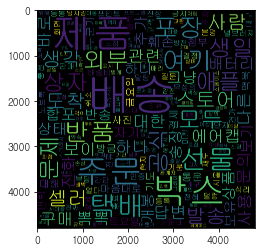

In [36]:
wc = WordCloud(font_path = font_path, width=1200, height = 1200, scale=4.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

### 동사만 워드크라우드

In [58]:
# ("Noun","Adverb","Adjective","Verb")
main_pos_verb = []
for sentence in n_df['main_pos']:
    pos = okt.pos(sentence) # 명사만 추출 
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Verb")]
    words = [n for n in main_words if len(n)>1] # 단어의 길이가 1개인 것은 제외
    main_pos_verb.append(words)

In [59]:
main_pos_verb_lst = sum(main_pos_verb, []) # 2차원 리스트를 1차원 리스트로 변환 

In [60]:
c = Counter(main_pos_verb_lst)

In [61]:
c

Counter({'남기다': 1,
         '하다': 49,
         '들다': 1,
         '달다': 2,
         '맞다': 1,
         '하고': 2,
         '사다': 1,
         '않다': 5,
         '싶다': 3,
         '해보다': 1,
         '남다': 1,
         '오다': 3,
         '보내다': 6,
         '깨지다': 1,
         '써다': 3,
         '보다': 1,
         '넘다': 1,
         '받다': 11,
         '걸리다': 4,
         '돼다': 1,
         '흐르다': 1,
         '손대다': 1,
         '되다': 5,
         '열다': 1,
         '켜지다': 1,
         '켜다': 1,
         '쓸다': 1,
         '되어다': 4,
         '붙다': 2,
         '내다': 2,
         '헐다': 2,
         '깔리다': 1,
         '모르다': 1,
         '배우다': 1,
         '늦다': 2,
         '담주': 1,
         '끄다': 1,
         '잡다': 1,
         '비추다': 1,
         '찍다': 1,
         '넣다': 2,
         '해주다': 2,
         '듣다': 1,
         '겠다': 1,
         '바꾸다': 1,
         '까먹다': 2,
         '지나다': 1,
         '버리다': 1,
         '없어지다': 1,
         '드리다': 1,
         '자다': 1})

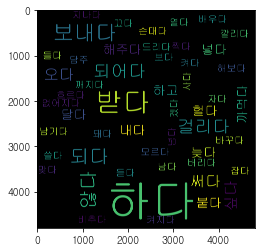

In [62]:
wc = WordCloud(font_path = font_path, width=1200, height = 1200, scale=4.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

### 부사만 워드 클라우드

In [63]:
# ("Noun","Adverb","Adjective","Verb")
main_pos_verb = []
for sentence in n_df['main_pos']:
    pos = okt.pos(sentence) # 명사만 추출 
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Adverb")]
    words = [n for n in main_words if len(n)>1] # 단어의 길이가 1개인 것은 제외
    main_pos_verb.append(words)
main_pos_verb_lst = sum(main_pos_verb, []) # 2차원 리스트를 1차원 리스트로 변환 
c = Counter(main_pos_verb_lst)
c

Counter({'함께': 1,
         '근데': 1,
         '없이': 1,
         '너무': 7,
         '아직': 1,
         '열심히': 1,
         '오래': 2,
         '괜히': 1,
         '그래도': 1,
         '많이': 1,
         '그만큼': 1,
         '아직도': 1})

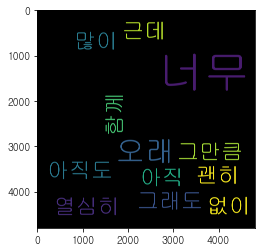

In [64]:
wc = WordCloud(font_path = font_path, width=1200, height = 1200, scale=4.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

### 형용사만 워드클라우드

In [65]:
# ("Noun","Adverb","Adjective","Verb")
main_pos_verb = []
for sentence in n_df['main_pos']:
    pos = okt.pos(sentence) # 명사만 추출 
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Adjective")]
    words = [n for n in main_words if len(n)>1] # 단어의 길이가 1개인 것은 제외
    main_pos_verb.append(words)
main_pos_verb_lst = sum(main_pos_verb, []) # 2차원 리스트를 1차원 리스트로 변환 
c = Counter(main_pos_verb_lst)
c

Counter({'없다': 8,
         '나쁘다': 1,
         '있다': 5,
         '좋다': 6,
         '빨르다': 2,
         '당연하다': 1,
         '아니다': 2,
         '안되다': 2,
         '느리다': 1,
         '멋지다': 1,
         '이러하다': 1,
         '답답하다': 1,
         '불안하다': 1,
         '같다': 3,
         '불편하다': 3,
         '싫다': 3,
         '필요하다': 1,
         '서툴다': 1,
         '아쉽다': 1,
         '찝찝하다': 1,
         '크나크다': 1,
         '귀찮다': 1,
         '유명하다': 1,
         '노랗다': 2,
         '희다': 1,
         '작다': 1,
         '그렇다': 1,
         '만족하다': 2,
         '비싸다': 1,
         '기쁘다': 1,
         '바쁘다': 1,
         '이렇다': 2,
         '속상하다': 1,
         '반갑다': 1,
         '저렴하다': 1,
         '많다': 2})

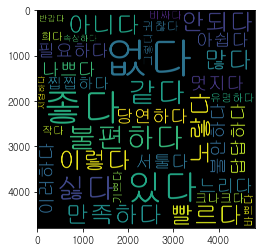

In [66]:
wc = WordCloud(font_path = font_path, width=1200, height = 1200, scale=4.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

## 원하는 최종 결과물
네이버 리뷰 같이 주요 키워드를 넣어 최종적으로 문장 형식으로 만들었으면 좋겠다.
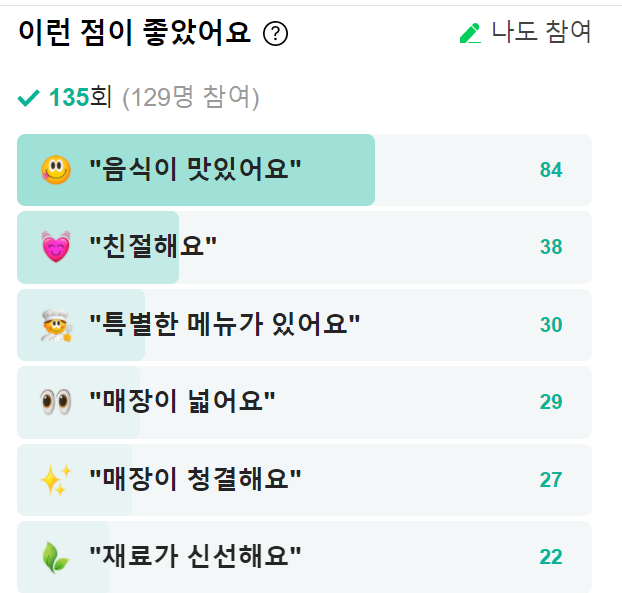 

### 분석 과정 
- 리뷰 분석을 통해 문장에서 키워드를 추출
- 키워드로 소비자에게 전달할 요약 문장 생성
- 요약 문장은 서술어로 끝나는 말그대로 "문장" 형태로 만드는 거
- 이를 통해, 전체 리뷰에 대한 평균적 리뷰를 보여줄 수 있다

### 결론 
- 전체 리뷰에 대한 평균적 리뷰를 보여줄 수 있다
- 어떤 키워드(문제) 때문에 낮은 평점을 받은 것인지, 여러 리뷰를 보지 않고도 간략히 알 수 있다